# **PSO Minimization**

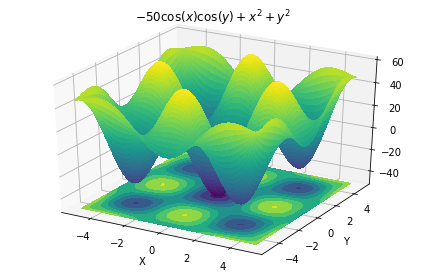

In [1]:
#3D plot
import numpy as np
import math
import random
import matplotlib.pyplot as plt
#function that models the problem
def function(position):
    return -50*math.cos(position[0])*math.cos(position[1]) + \
    position[0]**2 + position[1]**2
#plot the fitness function 
from mpl_toolkits.mplot3d import Axes3D
n=100
low_limit=-5
up_limit=5
# Creates n equally spaced values between low_limit and up_limit
x_vals=np.linspace(low_limit,up_limit,n+1)
y_vals=np.linspace(low_limit,up_limit,n+1)
# Create n*n matrices x and y with all combinations of x_vals and y_vals
x,y=np.meshgrid(x_vals, y_vals)
z=np.zeros_like(x)
for i in range(n+1):
    for j in range(n+1):
        z[i,j]=function([x[i,j],y[i,j]])
#Plot the 3D plot
fig=plt.figure()
#adding 3d projection to the plot
ax0=plt.axes(projection='3d')
surf=ax0.plot_surface(x, y, z, rstride=1, cstride=1,
cmap='viridis', linewidth=0, antialiased=False)
# Plot the contour plot of z values
ax0.contourf(x, y, z, zdir='z', offset=-50, cmap='viridis')
ax0.set_title(r'$-50\cos(x)\cos(y) + x^2 + y ^2$')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
plt.tight_layout()

In [2]:
#Parameter Initialization
#Initializing the velocity calculation parameters
w=0.2
c1=0.5
c2=0.9
seed=12
np.random.seed(seed)
n_itr=50
threshold=10e-05
n_particles=50

In [3]:
#Variable Initialization
# (i) Particle position initialization
curr_pos=np.random.uniform(-30,30,(n_particles,2))
part_best_pos=curr_pos
part_best_val=np.array([float('inf') for _ in range(n_particles)])
glob_best_val=float('inf')
glob_best_prev_val=float('inf')
glob_best_pos=np.array([float('inf'), float('inf')])
velocity=([np.array([0, 0]) for _ in range(n_particles)])
iteration=0
markers=['o', 'x', 'c*', 'r+' , 'bo', 'x']
c=0

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
The best position is  [-0.00789019 -0.00041137] in iteration number  50


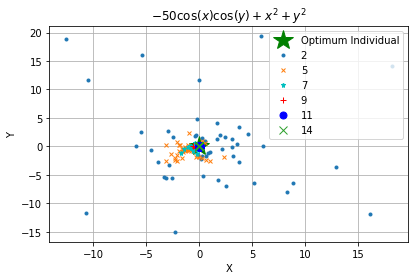

In [4]:
fig, ax0=plt.subplots(1,1)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_title(r'$-50\cos(x)\cos(y) + x^2 + y ^2$')
ax0.grid(True)
# Mark the optimum Individuals [0,0] as a star
ax0.plot([0], [0], 'g*', markersize=20, 
label='Optimum Individual')
ax0.legend(loc='lower left')
plt.tight_layout()
#Steps (ii)-(v)
for iteration in range (n_itr+1):
    print ('Iteration: ', iteration)
    for i in range(n_particles):
# (ii) Evaluate fitness value
        fit_candidate=function(curr_pos[i])
# (iii) Update particle best position and global best position
        if(part_best_val[i] >= fit_candidate):
            part_best_val[i]=fit_candidate
            part_best_pos[i]=curr_pos[i]

    part_vals=np.array([function(x) for x in curr_pos])
    parts_best_val=min(part_vals)
    best_part=curr_pos[np.argmin(part_vals),:]
    if(glob_best_val >= parts_best_val):
        glob_best_prev_val=glob_best_val
        glob_best_val=parts_best_val
        glob_best_pos=best_part
# Plot selected iterations particles positions
    if (iteration in [2,5,7,9,11,14]):
        ax0.plot(part_best_pos[:,0],part_best_pos[:,1],
        markers[c],label = '{}'.format(iteration), 
        markersize = c+3)
        c = c + 1
# (iv) Update the particle velocities and new positions
    for i in range(n_particles): 
        new_velocity=(w*velocity[i]) + (c1*np.random.uniform()) \
        * (part_best_pos[i] - curr_pos \
        [i]) + (c2*np.random.uniform()) * \
        (glob_best_pos-curr_pos[i])
        new_position=new_velocity + curr_pos[i]
        curr_pos[i]=new_position
        velocity[i]=new_velocity
# (v) Terminate if the termination condition is met
    if(abs(glob_best_val - glob_best_prev_val) < threshold): 
        break
ax0.legend()
print("The best position is ", glob_best_pos, "in iteration number ",
iteration)